In [1]:
pip install qiskit torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install qiskit-aer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 28.3 MB/s eta 0:00:00


In [3]:
!pip install qiskit-aer --upgrade


In [4]:
!pip install qiskit-aer
from qiskit_aer import Aer

print(Aer.backends())

[AerSimulator('aer_simulator'), AerSimulator('aer_simulator_statevector'), AerSimulator('aer_simulator_density_matrix'), AerSimulator('aer_simulator_stabilizer'), AerSimulator('aer_simulator_matrix_product_state'), AerSimulator('aer_simulator_extended_stabilizer'), AerSimulator('aer_simulator_unitary'), AerSimulator('aer_simulator_superop'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator')]


In [5]:
!pip install qiskit torch
!pip install qiskit-aer
!pip install qiskit-aer --upgrade

from qiskit import QuantumCircuit, transpile
from qiskit.primitives import StatevectorSampler
from qiskit_aer import AerSimulator
import numpy as np

# Quantum Circuit Simulation
def create_quantum_circuit(theta):
    """
    Create a simple quantum circuit with a rotation.
    :param theta: Rotation angle for the qubit.
    """
    qc = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit
    qc.rx(theta, 0)  # Applying rotation around the X-axis with angle theta
    qc.measure(0, 0)  # Measuring the qubit into the classical bit
    return qc

def simulate_quantum_circuit(theta):
    """
    Simulate the quantum circuit with the given rotation.
    :param theta: Rotation angle for the qubit.
    :return: Measurement result probability (0 or 1).
    """
    qc = create_quantum_circuit(theta)


    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(qc)


    total_shots = sum(counts.values())
    probability_of_1 = counts.get('1', 0) / total_shots if total_shots else 0
    return probability_of_1

# Testing the quantum simulation
theta = np.pi / 4  # Example rotation angle
probability = simulate_quantum_circuit(theta)
print(f"Probability of measuring |1⟩: {probability}")

Probability of measuring |1⟩: 0.136


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim


class QuantumCircuitPredictor(nn.Module):
    def __init__(self):
        super(QuantumCircuitPredictor, self).__init__()
        self.fc1 = nn.Linear(1, 16)  # Input layer with 1 feature (theta)
        self.fc2 = nn.Linear(16, 16)  # Hidden layer
        self.fc3 = nn.Linear(16, 1)   # Output layer (predicted probability)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Output between 0 and 1 (probability)
        return x


model = QuantumCircuitPredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model to match quantum simulation outputs
def train_model(model, target_probability, theta_values, epochs=100):
    """
    Train the model to predict the probability from quantum circuit simulation.
    :param model: Neural network model.
    :param target_probability: Target probability we want the quantum circuit to achieve.
    :param theta_values: Range of theta angles to train the model on.
    :param epochs: Number of training epochs.
    """
    for epoch in range(epochs):
        total_loss = 0
        for theta in theta_values:
            optimizer.zero_grad()
            theta_tensor = torch.tensor([[theta]], dtype=torch.float32)  # Input angle
            predicted_prob = model(theta_tensor)  # Model's prediction

            # Simulate quantum circuit output for the current theta
            true_prob = torch.tensor([[simulate_quantum_circuit(theta)]], dtype=torch.float32)

            # Compute loss between true and predicted probability
            loss = criterion(predicted_prob, true_prob)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {total_loss:.4f}")

# Generating a range of theta values for training
theta_values = np.linspace(0, 2 * np.pi, 100)

# Training the model
train_model(model, target_probability=0.5, theta_values=theta_values)

# Testing the model with new input
test_theta = torch.tensor([[np.pi / 2]], dtype=torch.float32)
predicted_probability = model(test_theta).item()
print(f"Predicted Probability for θ = π/2: {predicted_probability}")


Epoch 0/100, Loss: 18.2872
Epoch 10/100, Loss: 10.0996
Epoch 20/100, Loss: 9.4559
Epoch 30/100, Loss: 9.5784
Epoch 40/100, Loss: 9.4635
Epoch 50/100, Loss: 9.4453
Epoch 60/100, Loss: 22.2311
Epoch 70/100, Loss: 2.4935
Epoch 80/100, Loss: 0.7490
Epoch 90/100, Loss: 0.1926
Predicted Probability for θ = π/2: 0.38869279623031616


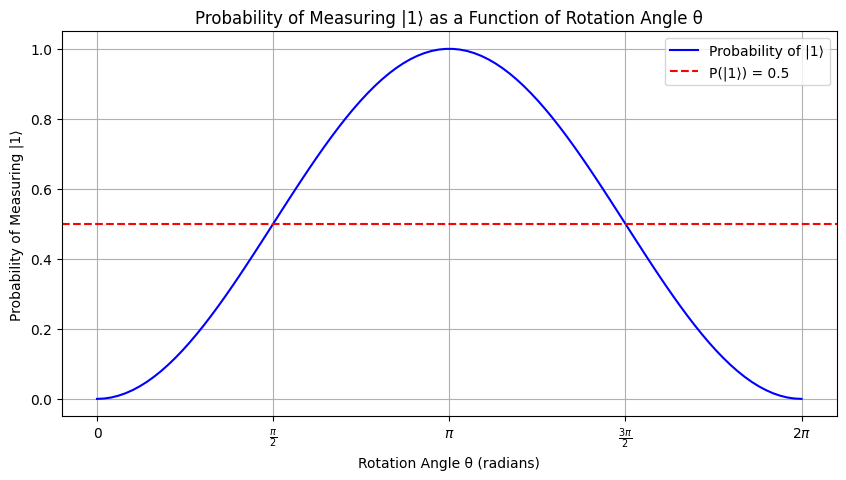

In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt


def create_quantum_circuit(theta):
    qc = QuantumCircuit(1)  # 1 qubit, no classical bit required for statevector simulation
    qc.rx(theta, 0)  # Apply rotation around the X-axis with angle theta
    return qc

# Simulating the quantum circuit and retrieve the probability of measuring |1⟩
def simulate_quantum_circuit(theta):
    qc = create_quantum_circuit(theta)

    # Simulating the quantum circuit using the Statevector class
    statevector = Statevector.from_instruction(qc)  # Get the statevector from the circuit

    # Probability of measuring |1⟩ is the square of the amplitude of the second state
    probability_of_1 = np.abs(statevector.data[1]) ** 2  # statevector.data gives the amplitudes
    return probability_of_1

theta_values = np.linspace(0, 2 * np.pi, 100)
probabilities = []


for theta in theta_values:
    probability = simulate_quantum_circuit(theta)
    probabilities.append(probability)

# results
plt.figure(figsize=(10, 5))
plt.plot(theta_values, probabilities, label='Probability of |1⟩', color='blue')
plt.title('Probability of Measuring |1⟩ as a Function of Rotation Angle θ')
plt.xlabel('Rotation Angle θ (radians)')
plt.ylabel('Probability of Measuring |1⟩')
plt.axhline(0.5, color='red', linestyle='--', label='P(|1⟩) = 0.5')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, 2 * np.pi + 0.1, np.pi/2),
           ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.show()


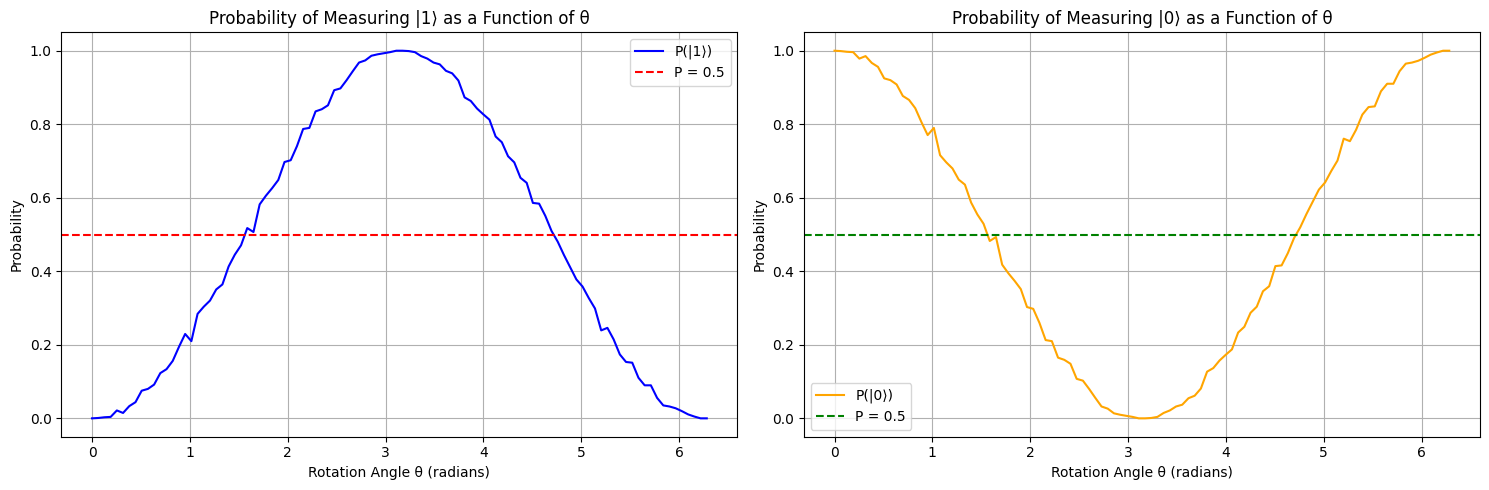

In [17]:
from qiskit import QuantumCircuit, transpile
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

# Function to create a single-qubit circuit with RX(θ)
def create_quantum_circuit(theta):
    qc = QuantumCircuit(1, 1)
    qc.rx(theta, 0)
    qc.measure(0, 0)
    return qc

# Function to simulate the quantum circuit and return measurement probabilities
def simulate_quantum_circuit(theta):
    qc = create_quantum_circuit(theta)

    backend = AerSimulator()
    transpiled_circuit = transpile(qc, backend)

    # Use modern 'run' method instead of assemble (recommended)
    job = backend.run(transpiled_circuit, shots=1024)
    result = job.result()
    counts = result.get_counts()

    probability_of_1 = counts.get('1', 0) / 1024
    probability_of_0 = counts.get('0', 0) / 1024

    return probability_of_1, probability_of_0

# Generate θ values from 0 to 2π
theta_values = np.linspace(0, 2 * np.pi, 100)
probabilities_1 = []
probabilities_0 = []

# Run simulation for each θ
for theta in theta_values:
    prob_1, prob_0 = simulate_quantum_circuit(theta)
    probabilities_1.append(prob_1)
    probabilities_0.append(prob_0)

# Plotting results
plt.figure(figsize=(15, 5))

# Probability of measuring |1⟩
plt.subplot(1, 2, 1)
plt.plot(theta_values, probabilities_1, label='P(|1⟩)', color='blue')
plt.title('Probability of Measuring |1⟩ as a Function of θ')
plt.xlabel('Rotation Angle θ (radians)')
plt.ylabel('Probability')
plt.axhline(0.5, color='red', linestyle='--', label='P = 0.5')
plt.legend()
plt.grid(True)

# Probability of measuring |0⟩
plt.subplot(1, 2, 2)
plt.plot(theta_values, probabilities_0, label='P(|0⟩)', color='orange')
plt.title('Probability of Measuring |0⟩ as a Function of θ')
plt.xlabel('Rotation Angle θ (radians)')
plt.ylabel('Probability')
plt.axhline(0.5, color='green', linestyle='--', label='P = 0.5')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [30]:
!pip install qiskit qiskit-aer --quiet


In [32]:
%matplotlib inline


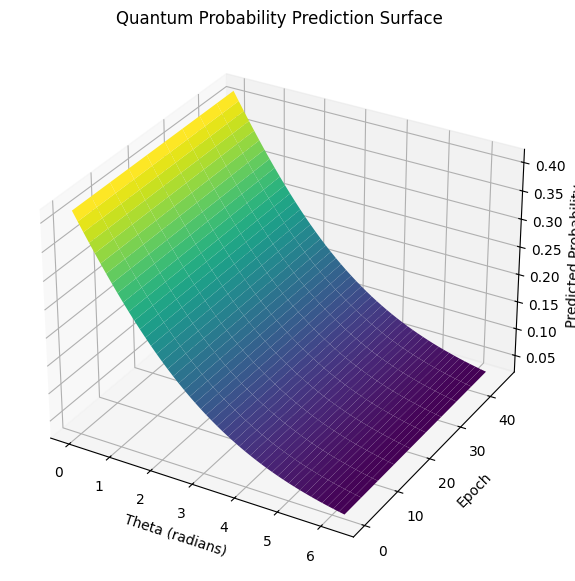

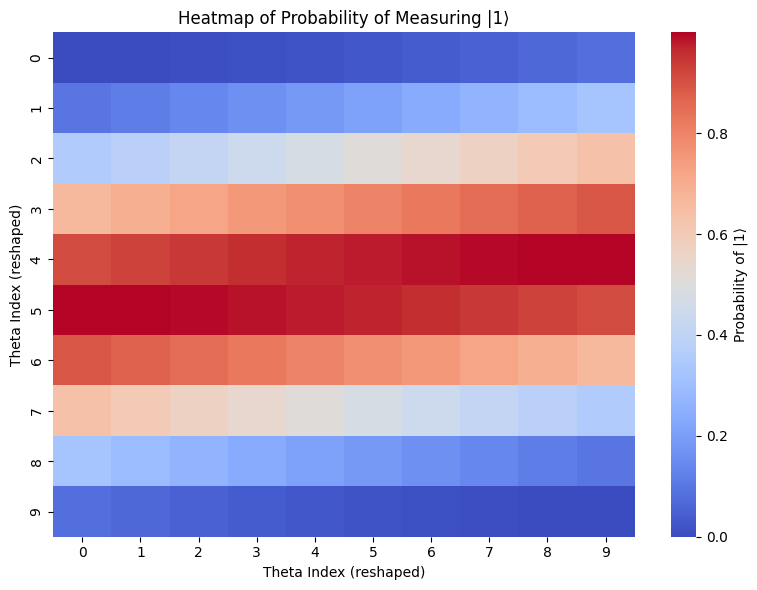

In [35]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Dummy simulate function
def simulate_quantum_circuit(theta):
    # Just simulate sin^2(theta / 2)
    p1 = np.sin(theta / 2)**2
    return p1, 1 - p1

# Simple PyTorch model
class SimpleModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = SimpleModel()

# Plot 3D training dynamics
def plot_training_dynamics(model, epochs=50):
    theta_grid = np.linspace(0, 2 * np.pi, 50)
    epoch_grid = np.arange(0, epochs, 5)
    Theta, Epochs = np.meshgrid(theta_grid, epoch_grid)
    Z = np.zeros_like(Theta)

    model.eval()
    with torch.no_grad():
        for i in range(len(epoch_grid)):
            for j in range(len(theta_grid)):
                theta = torch.tensor([[Theta[i, j]]], dtype=torch.float32)
                output = model(theta).squeeze().item()
                Z[i, j] = output

    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(Theta, Epochs, Z, cmap='viridis')
    ax.set_title('Quantum Probability Prediction Surface')
    ax.set_xlabel('Theta (radians)')
    ax.set_ylabel('Epoch')
    ax.set_zlabel('Predicted Probability')
    plt.show()

# Heatmap plot
def heatmap_probabilities(theta_values):
    prob_1 = []
    for theta in theta_values:
        p1, _ = simulate_quantum_circuit(theta)
        prob_1.append(p1)

    heatmap_data = np.array(prob_1).reshape(10, 10)

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Probability of |1⟩'})
    plt.title("Heatmap of Probability of Measuring |1⟩")
    plt.xlabel("Theta Index (reshaped)")
    plt.ylabel("Theta Index (reshaped)")
    plt.tight_layout()
    plt.show()

# Run them
theta_values = np.linspace(0, 2 * np.pi, 100)
plot_training_dynamics(model, epochs=50)
heatmap_probabilities(theta_values)


In [33]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import torch

def plot_training_dynamics(model, epochs=50):
    theta_grid = np.linspace(0, 2 * np.pi, 50)
    epoch_grid = np.arange(0, epochs, 5)
    Theta, Epochs = np.meshgrid(theta_grid, epoch_grid)
    Z = np.zeros_like(Theta)

    model.eval()  # Important: disable dropout/batchnorm if any

    with torch.no_grad():  # Disable gradients for faster computation
        for i in range(len(epoch_grid)):
            for j in range(len(theta_grid)):
                theta = torch.tensor([[Theta[i, j]]], dtype=torch.float32)
                output = model(theta).squeeze().item()
                Z[i, j] = output

    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(Theta, Epochs, Z, cmap='viridis')
    ax.set_title('Quantum Probability Prediction Surface')
    ax.set_xlabel('Theta (radians)')
    ax.set_ylabel('Epoch')
    ax.set_zlabel('Predicted Probability')
    plt.show()



In [34]:
import seaborn as sns

def heatmap_probabilities(theta_values):
    prob_1 = []
    for theta in theta_values:
        p1, _ = simulate_quantum_circuit(theta)
        prob_1.append(p1)

    heatmap_data = np.array(prob_1).reshape(10, 10)  # assuming 100 theta values

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Probability of |1⟩'})
    plt.title("Heatmap of Probability of Measuring |1⟩")
    plt.xlabel("Theta Index (reshaped)")
    plt.ylabel("Theta Index (reshaped)")
    plt.tight_layout()
    plt.show()


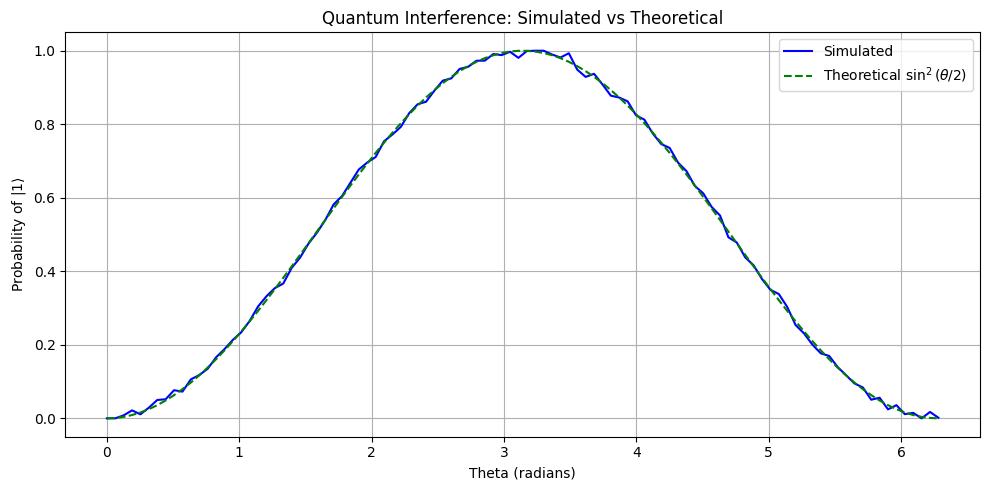

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy simulation function for demonstration
def simulate_quantum_circuit(theta):
    """
    Simulates a quantum circuit output.
    For real use, replace this with qiskit or a backend simulator.
    """
    # Add a small noise to simulate experimental imperfection
    noise = np.random.normal(0, 0.01)
    prob_1 = np.sin(theta / 2)**2 + noise
    # Clip to keep probability in [0, 1]
    prob_1 = np.clip(prob_1, 0, 1)
    return [prob_1, 1 - prob_1]

# Plotting function
def interference_pattern(theta_values):
    simulated = [simulate_quantum_circuit(theta)[0] for theta in theta_values]
    theoretical = [np.sin(theta / 2)**2 for theta in theta_values]

    plt.figure(figsize=(10, 5))
    plt.plot(theta_values, simulated, label='Simulated', color='blue')
    plt.plot(theta_values, theoretical, label='Theoretical $\sin^2(\\theta/2)$', linestyle='--', color='green')
    plt.title('Quantum Interference: Simulated vs Theoretical')
    plt.xlabel('Theta (radians)')
    plt.ylabel('Probability of $|1\\rangle$')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
theta_vals = np.linspace(0, 2 * np.pi, 100)
interference_pattern(theta_vals)



/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 0, Loss: 0.92325
Epoch 100, Loss: 0.00416
Epoch 200, Loss: 0.00225
Epoch 300, Loss: 0.00141
Epoch 400, Loss: 0.00120
Epoch 500, Loss: 0.00099
Epoch 600, Loss: 0.00100
Epoch 700, Loss: 0.00106
Epoch 800, Loss: 0.00085
Epoch 900, Loss: 0.00092


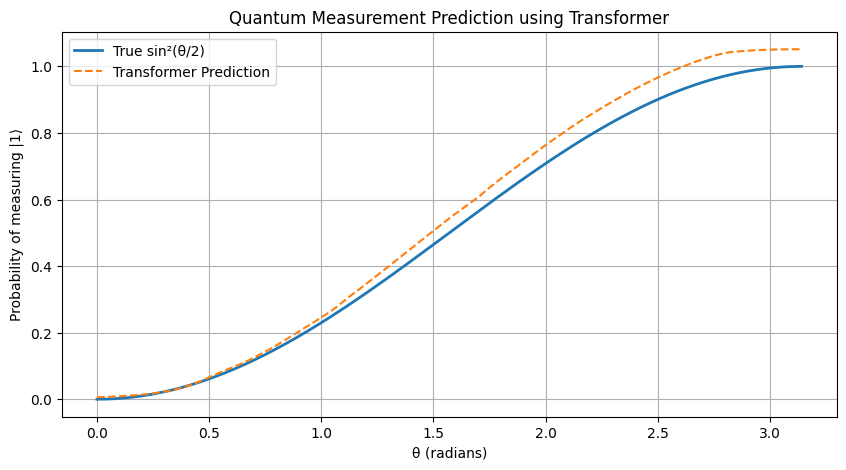

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Generate data
theta_vals = np.linspace(0, np.pi, 1000)
labels = np.sin(theta_vals / 2)**2

# Convert to tensor
X = torch.tensor(theta_vals, dtype=torch.float32).unsqueeze(1)  # Shape: [1000, 1]
y = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

# Add positional encoding
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=1000):
        super().__init__()
        pos = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)
        i = torch.arange(0, d_model, dtype=torch.float32)
        angle_rates = 1 / (10000 ** (2 * (i // 2) / d_model))
        angle_rads = pos * angle_rates

        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(angle_rads[:, 0::2])
        pe[:, 1::2] = torch.cos(angle_rads[:, 1::2])
        self.pe = pe.unsqueeze(0)  # Shape: [1, max_len, d_model]

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

# Define Transformer model
class TransformerRegressor(nn.Module):
    def __init__(self, d_model=32, nhead=4, num_layers=2):
        super().__init__()
        self.input_fc = nn.Linear(1, d_model)
        self.pos_encoder = PositionalEncoding(d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(d_model, 1)

    def forward(self, x):
        x = self.input_fc(x)            # Shape: [batch, seq_len, d_model]
        x = self.pos_encoder(x)
        x = self.transformer(x)
        x = self.fc_out(x)
        return x

# Prepare data
X_seq = X.unsqueeze(1)  # [1000, 1, 1] -> sequence length = 1
y_seq = y

model = TransformerRegressor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_seq)
    loss = criterion(outputs.squeeze(), y_seq.squeeze())
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.5f}")

# Evaluation
model.eval()
predicted = model(X_seq).detach().numpy().squeeze()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(theta_vals, labels, label='True sin²(θ/2)', linewidth=2)
plt.plot(theta_vals, predicted, label='Transformer Prediction', linestyle='--')
plt.xlabel('θ (radians)')
plt.ylabel('Probability of measuring |1⟩')
plt.title('Quantum Measurement Prediction using Transformer')
plt.legend()
plt.grid(True)
plt.show()


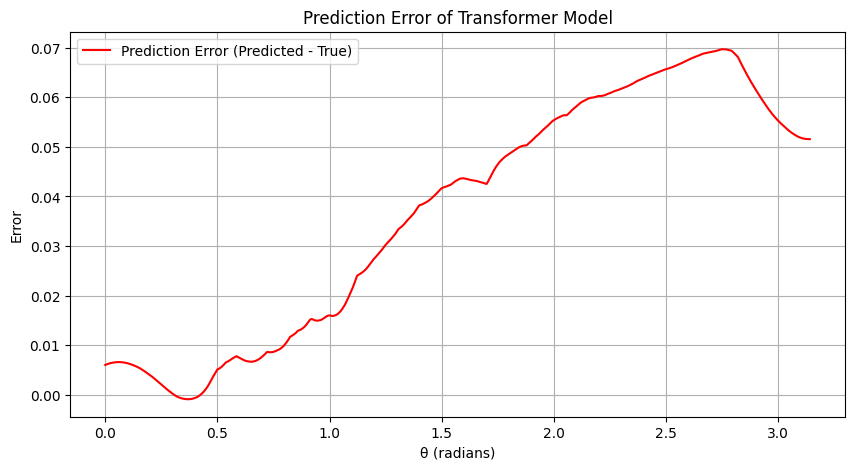

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `theta_vals`, `labels`, and `predicted` are already defined
error = predicted - labels

plt.figure(figsize=(10, 5))
plt.plot(theta_vals, error, label='Prediction Error (Predicted - True)', color='red')
plt.xlabel('θ (radians)')
plt.ylabel('Error')
plt.title('Prediction Error of Transformer Model')
plt.legend()
plt.grid(True)
plt.show()


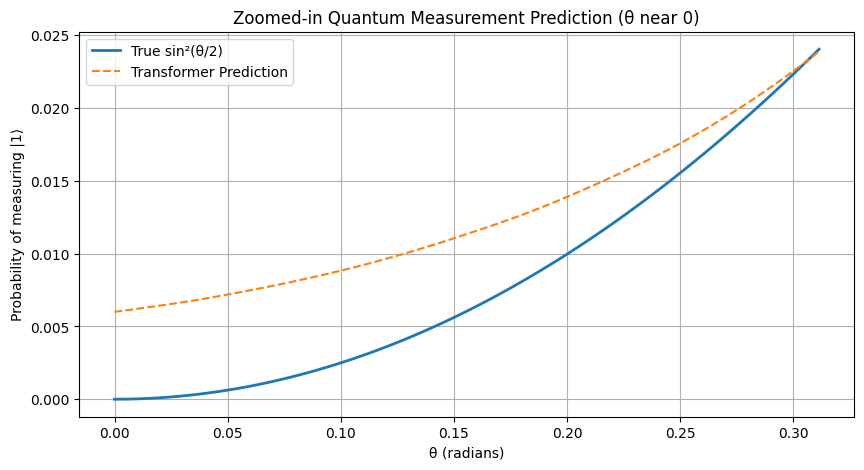

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(theta_vals[:100], labels[:100], label='True sin²(θ/2)', linewidth=2)
plt.plot(theta_vals[:100], predicted[:100], label='Transformer Prediction', linestyle='--')
plt.xlabel('θ (radians)')
plt.ylabel('Probability of measuring |1⟩')
plt.title('Zoomed-in Quantum Measurement Prediction (θ near 0)')
plt.legend()
plt.grid(True)
plt.show()


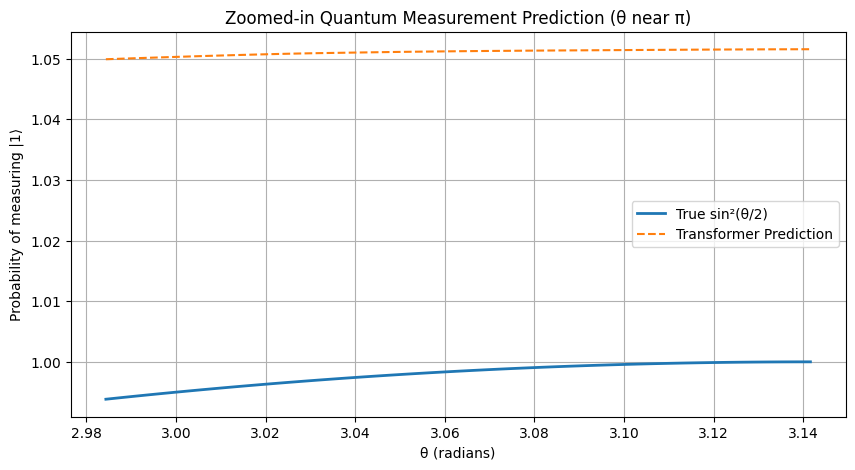

In [40]:
pi_index = np.abs(theta_vals - np.pi).argmin()
window = 50  # Adjust window size as needed

plt.figure(figsize=(10, 5))
plt.plot(theta_vals[pi_index-window:pi_index+window], labels[pi_index-window:pi_index+window], label='True sin²(θ/2)', linewidth=2)
plt.plot(theta_vals[pi_index-window:pi_index+window], predicted[pi_index-window:pi_index+window], label='Transformer Prediction', linestyle='--')
plt.xlabel('θ (radians)')
plt.ylabel('Probability of measuring |1⟩')
plt.title('Zoomed-in Quantum Measurement Prediction (θ near π)')
plt.legend()
plt.grid(True)
plt.show()


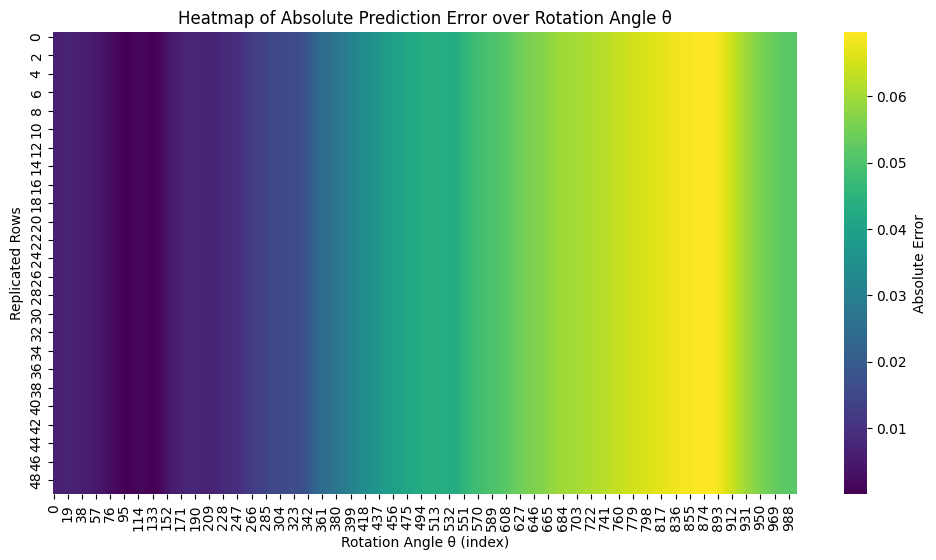

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming theta_vals, labels (true), predicted (model output) are already defined
error = np.abs(predicted - labels)

# Replicate error as rows for a 2D heatmap (visual effect)
heatmap_data = np.tile(error, (50, 1))  # 50 rows, len(theta_vals) columns

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Absolute Error'})
plt.title('Heatmap of Absolute Prediction Error over Rotation Angle θ')
plt.xlabel('Rotation Angle θ (index)')
plt.ylabel('Replicated Rows')
plt.show()


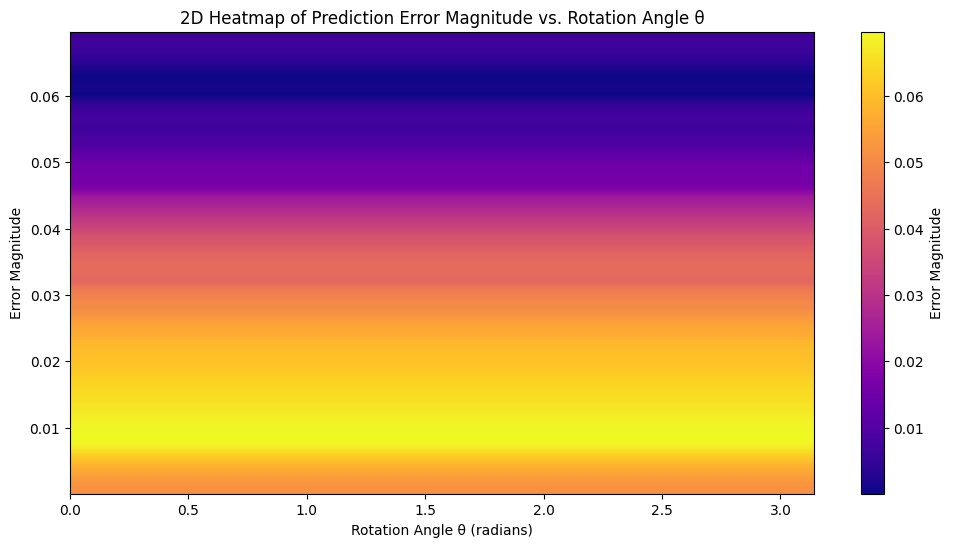

In [43]:
theta_grid, error_grid = np.meshgrid(theta_vals, error)

plt.figure(figsize=(12, 6))
plt.imshow(error_grid, extent=[theta_vals.min(), theta_vals.max(), error.min(), error.max()],
           aspect='auto', cmap='plasma')
plt.colorbar(label='Error Magnitude')
plt.xlabel('Rotation Angle θ (radians)')
plt.ylabel('Error Magnitude')
plt.title('2D Heatmap of Prediction Error Magnitude vs. Rotation Angle θ')
plt.show()


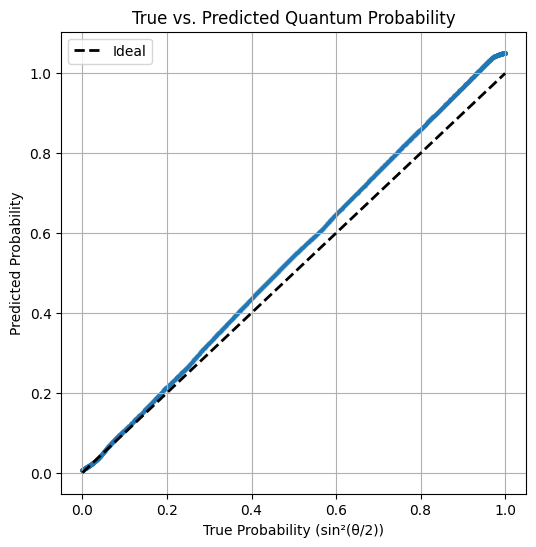

In [44]:
plt.figure(figsize=(6, 6))
plt.scatter(labels, predicted, s=5, alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Ideal")
plt.xlabel("True Probability (sin²(θ/2))")
plt.ylabel("Predicted Probability")
plt.title("True vs. Predicted Quantum Probability")
plt.legend()
plt.grid(True)
plt.show()


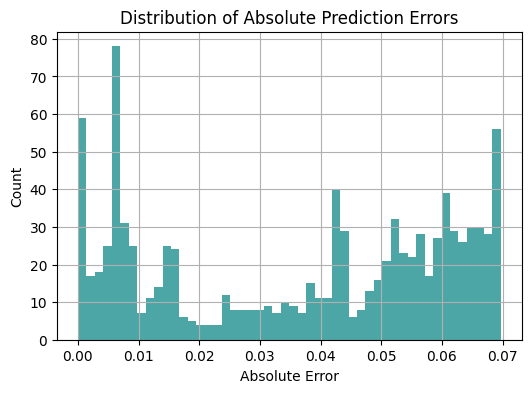

In [45]:
plt.figure(figsize=(6,4))
plt.hist(np.abs(predicted - labels), bins=50, color='teal', alpha=0.7)
plt.xlabel('Absolute Error')
plt.ylabel('Count')
plt.title('Distribution of Absolute Prediction Errors')
plt.grid(True)
plt.show()
